1.Train-Test Split
Split your cleaned data into features (X) and target (y), then create training and test sets:

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('telco_churn_cleaned.csv')
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

2.Feature Scaling
Scaler improves model performance for algorithms like Logistic Regression:

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Train a Logistic Regression Model
A simple, interpretable baseline model for churn prediction:

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

4. Model Evaluation
Check core metrics for classification performance:

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred_prob))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1007
           1       0.64      0.59      0.62       372

    accuracy                           0.80      1379
   macro avg       0.75      0.73      0.74      1379
weighted avg       0.80      0.80      0.80      1379

ROC AUC: 0.8318250739447524
Confusion Matrix:
 [[884 123]
 [152 220]]


5. Feature Importance
Identify which features most strongly influence churn prediction:

In [8]:
import pandas as pd

feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance.sort_values(ascending=False).head(10)

,0
InternetService_Fiber optic,0.610724
TotalCharges,0.535459
StreamingTV_Yes,0.204425
StreamingMovies_Yes,0.185834
PaperlessBilling_Yes,0.169915
MultipleLines_Yes,0.169677
PaymentMethod_Electronic check,0.149551
SeniorCitizen_Yes,0.105234
Partner_Yes,0.031283
DeviceProtection_Yes,-0.002670


 6.Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_prob = dt_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_dt))
print('ROC AUC:', roc_auc_score(y_test, y_pred_dt_prob))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1007
           1       0.60      0.52      0.56       372

    accuracy                           0.78      1379
   macro avg       0.71      0.70      0.70      1379
weighted avg       0.77      0.78      0.77      1379

ROC AUC: 0.8170694920502719
Confusion Matrix:
 [[875 132]
 [177 195]]


 7.Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_pred_rf_prob))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1007
           1       0.61      0.51      0.55       372

    accuracy                           0.78      1379
   macro avg       0.72      0.69      0.70      1379
weighted avg       0.77      0.78      0.77      1379

ROC AUC: 0.810127494634334


8.XGBoost Classifier

In [17]:
!pip install xgboost

In [18]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_xgb))
print('ROC AUC:', roc_auc_score(y_test, y_pred_xgb_prob))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1007
           1       0.59      0.54      0.57       372

    accuracy                           0.77      1379
   macro avg       0.71      0.70      0.71      1379
weighted avg       0.77      0.77      0.77      1379

ROC AUC: 0.8220000320338278


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:52:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


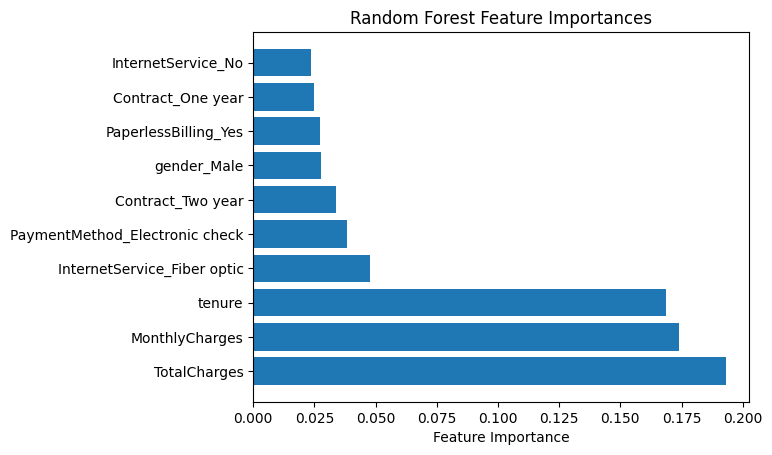

In [19]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
feat_names = X_train.columns
indices = importances.argsort()[::-1][:10]
plt.barh(range(10), importances[indices])
plt.yticks(range(10), [feat_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()
